building unet in keras

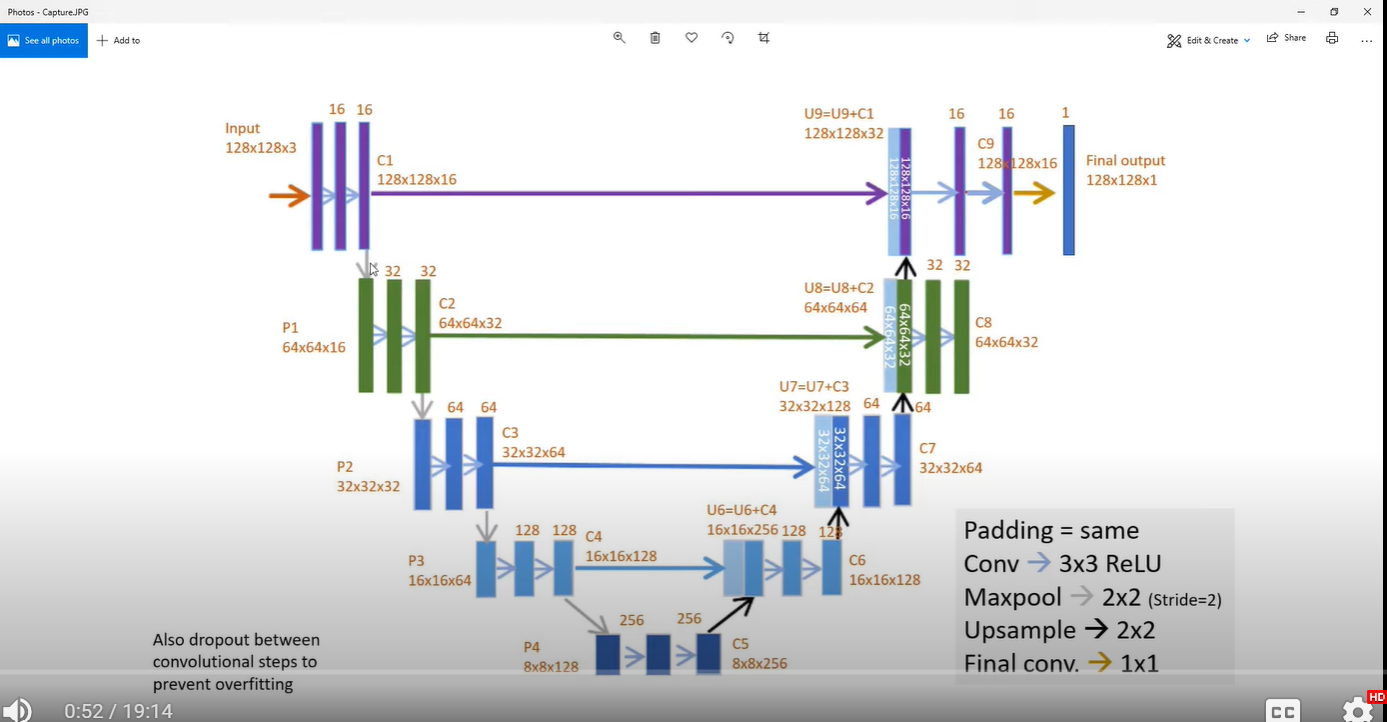

In [ ]:
# define image size*3
#building: all relu
#layers module in keras to define all
#note ...layers takes only floating point values.. wts are floating but input are not..even if the wts are multiplied by these inputs still in future it might show error
#1. input layer
#floating values: divide by 255.0..each pixel converted
#use layers for converting these input..use lambda
#2. conv (c1)..padding same
#3 dropout : 10%
# 4 conv2
#4. maxpooling(p1)2*2
#..whole encoder same

In [ ]:
img_ht = 224
img_wdt = 224
img_c = 3

import tensorflow as tf
from tensorflow.keras import layers

#input
inp = tf.keras.layers.Input((img_ht, img_wdt, img_c))
fl = tf.keras.layers.Lambda(lambda x:x/255)(inp)

#conv
c1 = tf.keras.layers.Conv2D(16,(3,3), activation='relu',kernel_initializer='he_normal',padding = 'same')(fl)
dr = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16,(3,3), activation='relu',kernel_initializer='he_normal',padding = 'same')(dr)
mx = tf.keras.layers.MaxPool2D((2,2),padding='same')(c1)

In [ ]:
c2 = tf.keras.layers.Conv2D(32,(3,3), activation='relu',kernel_initializer='he_normal',padding = 'same')(mx)
dr2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32,(3,3), activation='relu',kernel_initializer='he_normal',padding = 'same')(dr2)
mx2 = tf.keras.layers.MaxPool2D((2,2),padding='same')(c2)

In [ ]:
c3 = tf.keras.layers.Conv2D(64,(3,3), activation='relu',kernel_initializer='he_normal',padding = 'same')(mx2)
dr3 = tf.keras.layers.Dropout(0.1)(c3)
c3 = tf.keras.layers.Conv2D(64,(3,3), activation='relu',kernel_initializer='he_normal',padding = 'same')(dr3)
mx3 = tf.keras.layers.MaxPool2D((2,2),padding='same')(c3)

In [ ]:
c4 = tf.keras.layers.Conv2D(128,(3,3), activation='relu',kernel_initializer='he_normal',padding = 'same')(mx3)
dr4 = tf.keras.layers.Dropout(0.1)(c4)
c4 = tf.keras.layers.Conv2D(128,(3,3), activation='relu',kernel_initializer='he_normal',padding = 'same')(dr4)
mx4 = tf.keras.layers.MaxPool2D((2,2),padding='same')(c4)

In [ ]:
c5 = tf.keras.layers.Conv2D(256,(3,3), activation='relu',kernel_initializer='he_normal',padding = 'same')(mx4)
dr5 = tf.keras.layers.Dropout(0.1)(c5)
c5 = tf.keras.layers.Conv2D(256,(3,3), activation='relu',kernel_initializer='he_normal',padding = 'same')(dr5)
#mx5 = tf.keras.layers.MaxPool2D((2,2),padding='same')(c5)

In [ ]:
#decoder
#c6: use conv2dtranspose in layers which is opposite to conv2d
#concatenate([u6,c4]])
#conv2d
#dropout
#conv2d
#output:conv2d(1): sigmoid

In [ ]:
c6 = tf.keras.layers.Conv2DTranspose(128,(2,2),strides = (2,2),padding = 'same')(c5)
c6 = tf.keras.layers.concatenate([c6, c4])

c6 = tf.keras.layers.Conv2D(128,(3,3), activation='relu',kernel_initializer='he_normal',padding = 'same')(c6)
dr6 = tf.keras.layers.Dropout(0.1)(c6)
c6 = tf.keras.layers.Conv2D(128,(3,3), activation='relu',kernel_initializer='he_normal',padding = 'same')(dr6)
#mx6 = tf.keras.layers.MaxPool2D((2,2),padding='same')(c6)

In [ ]:
c7 = tf.keras.layers.Conv2DTranspose(64,(2,2),strides = (2,2),padding = 'same')(c6)
c7 = tf.keras.layers.concatenate([c7, c3])

c7 = tf.keras.layers.Conv2D(64,(3,3), activation='relu',kernel_initializer='he_normal',padding = 'same')(c7)
dr7 = tf.keras.layers.Dropout(0.1)(c7)
c7 = tf.keras.layers.Conv2D(64,(3,3), activation='relu',kernel_initializer='he_normal',padding = 'same')(dr7)
#mx6 = tf.keras.layers.MaxPool2D((2,2),padding='same')(c6)

In [ ]:
c8 = tf.keras.layers.Conv2DTranspose(32,(2,2),strides = (2,2),padding = 'same')(c7)
c8 = tf.keras.layers.concatenate([c8, c2])

c8 = tf.keras.layers.Conv2D(32,(3,3), activation='relu',kernel_initializer='he_normal',padding = 'same')(c8)
dr8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32,(3,3), activation='relu',kernel_initializer='he_normal',padding = 'same')(dr8)

In [ ]:
c9 = tf.keras.layers.Conv2DTranspose(32,(2,2),strides = (2,2),padding = 'same')(c8)
c9 = tf.keras.layers.concatenate([c9, c1])

c9 = tf.keras.layers.Conv2D(32,(3,3), activation='relu',kernel_initializer='he_normal',padding = 'same')(c9)
dr9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(32,(3,3), activation='relu',kernel_initializer='he_normal',padding = 'same')(dr9)

In [ ]:
outputs= tf.keras.layers.Conv2D(1,(1,1), activation='sigmoid')(c9)

In [ ]:
#model: keras
#compile
#summary

In [ ]:
model = tf.keras.Model(inputs= [inp], outputs= [outputs])
#model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [ ]:
#results= model.fit(X,Y)

callbacks:
timestamps to save the model ..so as to notr lose it

1.early stopping: monitor val loss with patience=3: i.e for 3 consecutive epochs if there is no change in val loss, stop the traing: helps to avoid overfitting.
2. model checkpoint

In [ ]:
#Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

#results = model.fit(x_train, y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)

In [ ]:
!pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle competitions download -c data-science-bowl-2018

 97% 349M/358M [00:03<00:00, 47.4MB/s]
100% 358M/358M [00:03<00:00, 104MB/s] 


In [ ]:
!unzip '/content/data-science-bowl-2018.zip'

Archive:  /content/data-science-bowl-2018.zip
  inflating: stage1_sample_submission.csv.zip  
  inflating: stage1_solution.csv.zip  
  inflating: stage1_test.zip         
  inflating: stage1_train.zip        
  inflating: stage1_train_labels.csv.zip  
  inflating: stage2_sample_submission_final.csv.zip  
  inflating: stage2_test_final.zip   


In [ ]:
!mkdir train

In [ ]:
!mkdir test

In [ ]:
!unzip '/content/stage1_train.zip' -d train
!unzip '/content/stage1_test.zip' -d test

In [ ]:
#import os: to navigate thr files
#define training path and test (stage1)
#read all test and train ids: next(os.walk)=folder name=tuple
#take only folder name:[1]
#same for test
# create a zeros array: to fill up the details of the images..as they are in a separtate folder and to contain them together
#np.zeros((len(train_ids), dimen*3), dtype=uint8)
#same for ytrain:np.zeros((len(train_ids), dimen*2,1), dtype=bool)
#read and resize in loop
#tqdm: for progress visual
# loop:
#1. go to the folder: take image: resize :put it in xtrain array
#2. create an all black image and name it as mask
#3.open mask: take max value (so white portion) from each mask image(given)
#4.take max of the mask (all black) and the max from given mask and create a mask
#thus capturing all maxs from given masks together in one image
#after this mask loop for each folder: add this mask to ytrain

In [ ]:
import os
import numpy as np

train_path ='/content/train'
test_path ='/content/test'

In [ ]:
train_ids = next(os.walk(train_path))[1]
test_ids = next(os.walk(test_path))[1]

x_train = np.zeros((len(train_ids), img_ht, img_wdt, img_c), dtype = 'uint8')
y_train = np.zeros((len(train_ids), img_ht, img_wdt,1), dtype = 'bool')

/content/train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/images/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png

In [ ]:
from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
#train
for n,i in tqdm(enumerate(train_ids), total = len(train_ids)):
  #print(i)
  f=imread(train_path+'/' + (i)+ '/images/'+ i + '.png')[:,:,:img_c]
  c = resize(f, (img_ht, img_wdt), preserve_range =True,mode='constant')
  x_train[n]= c

  #mask=y_train
  mask = np.zeros((img_ht, img_wdt,1), dtype = 'bool')
  masks_path = next(os.walk(train_path+'/' + (i)+ '/masks/'))[2]
  for masks in masks_path:
    mf=imread(train_path+'/' + (i)+ '/masks/'+ masks)
    mc = resize(mf, (img_ht, img_wdt), preserve_range =True,mode='constant')
    mask_ = np.expand_dims(mc, axis=-1)
    mask= np.maximum(mask_,mask)

  y_train[n]= mask

  #d = imread(os.walk(i))


100%|██████████| 670/670 [06:04<00:00,  1.84it/s]


/content/train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks/07a9bf1d7594af2763c86e93f05d22c4d5181353c6d3ab30a345b908ffe5aadc.png

In [ ]:
#test image: no mask so like train...just 1st part

In [ ]:
y_train=y_train*1

In [ ]:
x_test = np.zeros((len(test_ids), img_ht, img_wdt, img_c), dtype = 'uint8')
for n,i in tqdm(enumerate(test_ids), total = len(test_ids)):
  #print(i)
  f=imread(test_path+'/' + (i)+ '/images/'+ i + '.png')[:,:,:img_c]
  c = resize(f, (img_ht, img_wdt), preserve_range =True,mode='constant')
  x_test[n]= c

100%|██████████| 65/65 [00:05<00:00, 10.91it/s]


In [ ]:
import tensorflow as tf
#import tf.keras as K
from keras.layers import Activation, Dense, Flatten
from keras import backend as K
def jacard_coef(y_true, y_pred):
    y_true_f = Flatten(y_true)
    y_pred_f = Flatten(y_pred)
    intersection = tf.keras.metrics.Sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (tf.keras.metrics.Sum(y_true_f) + tf.keras.metrics.Sum(y_pred_f) - intersection + 1.0)


def jacard_coef_loss(y_true, y_pred):
    return -jacard_coef(y_true, y_pred)  # -1 ultiplied as we want to minimize this value as loss function

In [ ]:
from keras import backend as K

def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

#Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(x_train, y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)

Epoch 1/25
38/38 [==============================] - 518s 13s/step - loss: 0.4893 - accuracy: 0.8094 - val_loss: 0.2793 - val_accuracy: 0.8556
Epoch 2/25
38/38 [==============================] - 510s 13s/step - loss: 0.2440 - accuracy: 0.8689 - val_loss: 0.1833 - val_accuracy: 0.9136
Epoch 3/25
38/38 [==============================] - 506s 13s/step - loss: 0.1466 - accuracy: 0.9457 - val_loss: 0.1542 - val_accuracy: 0.9423
Epoch 4/25
38/38 [==============================] - 493s 13s/step - loss: 0.1193 - accuracy: 0.9544 - val_loss: 0.1226 - val_accuracy: 0.9501
Epoch 5/25
38/38 [==============================] - 485s 13s/step - loss: 0.1091 - accuracy: 0.9583 - val_loss: 0.1249 - val_accuracy: 0.9479
Epoch 6/25
38/38 [==============================] - 493s 13s/step - loss: 0.0989 - accuracy: 0.9616 - val_loss: 0.1172 - val_accuracy: 0.9517
Epoch 7/25
38/38 [==============================] - 493s 13s/step - loss: 0.0964 - accuracy: 0.9622 - val_loss: 0.1272 - val_accuracy: 0.9467
Epoch 

3/3 [==============================] - 12s 3s/step


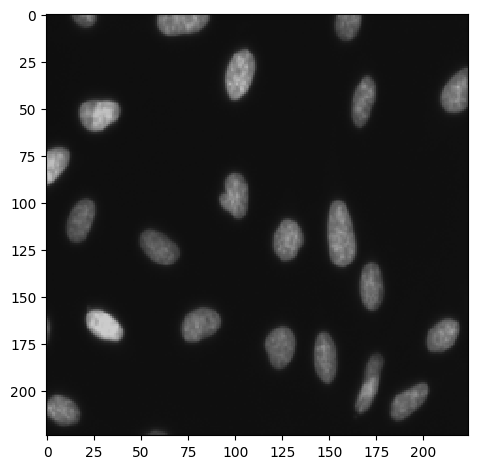

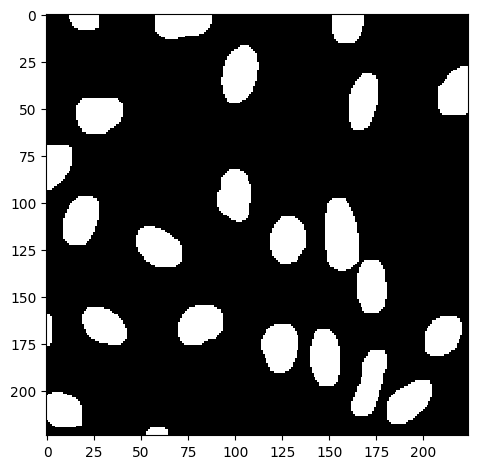

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


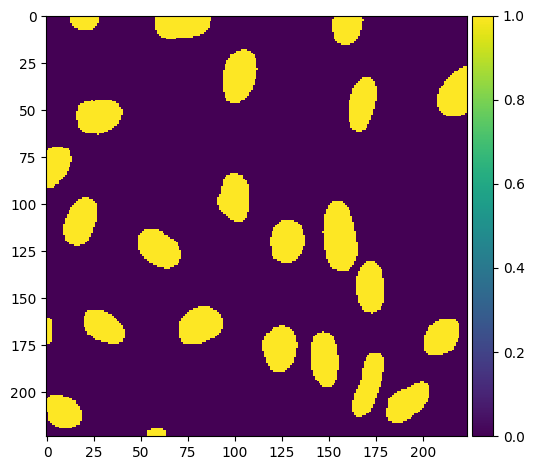

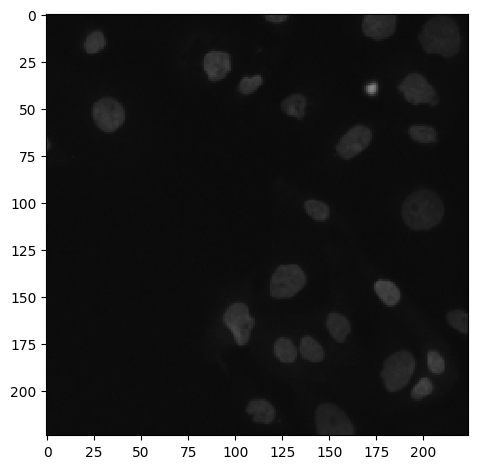

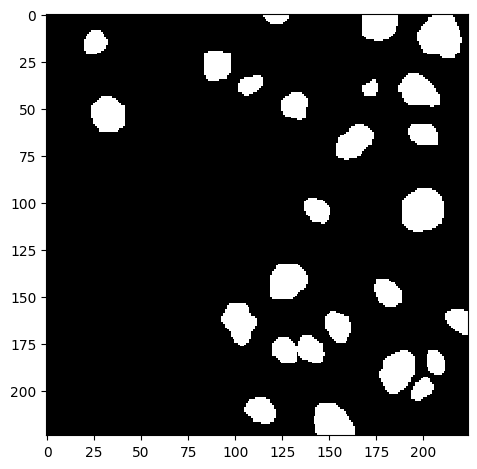

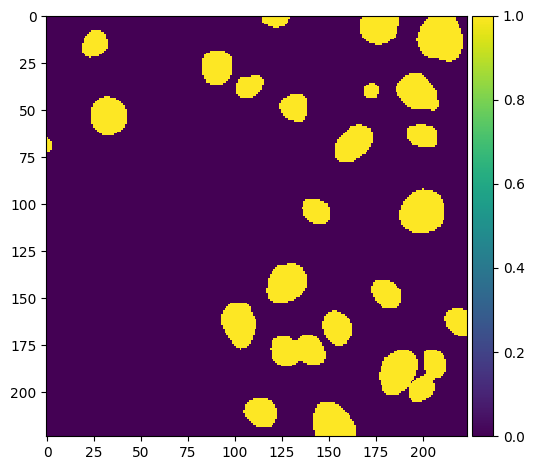

In [ ]:
import random

idx = random.randint(0, len(x_train))


preds_train = model.predict(x_train[:int(x_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(x_train[int(x_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(x_test, verbose=1)


preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


# Perform a sanity check on some random training samples
#ix = random.randint(0, len(preds_train_t))
#imshow(x_train[ix])
#plt.show()
#imshow(np.squeeze(y_train[ix]))
#plt.show()
#imshow(np.squeeze(preds_train_t[ix]))
#plt.show()

# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(x_train[int(x_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(y_train[int(y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()

In [ ]:
preds_test_t

In [ ]:
!unzip '/content/stage2_sample_submission_final.csv.zip'

Archive:  /content/stage2_sample_submission_final.csv.zip
  inflating: stage2_sample_submission_final.csv  
